## Módulo 3 Visualización básica con matplotlib y seaborn

Matplotlib es la librería de visualización básica de python. Seaborn es una especie de versión mejorada, construida sobre matplotlib.

Los gráficos se construye sobre, entre otras cosas Dataframes.

Ambas nos sirven para hacer exploración rápida y visual de nuestros datos. 

Las exploraciones visuales nos permiten responder a preguntas rápidas pero no a preguntas detalladas, para ello estás los análisis y los estudios.

Para este módulo usaremos un conjunto de datos basados en terremotos.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.csv"
df = pd.read_csv(url)
df.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-06-11T18:52:34.899Z,36.542400,-113.931200,9.1000,2.50,ml,8.0,170.6,0.60800,0.192,...,2025-06-11T19:20:19.221Z,"28 km SSE of Scenic, Arizona",earthquake,NaN,3.000000,0.870,7.0,reviewed,nn,nn
1,2025-06-11T18:28:27.701Z,56.699600,-121.723700,10.0000,4.40,mb,85.0,22.0,0.69500,0.900,...,2025-06-11T19:36:54.793Z,"73 km NW of Fort St. John, Canada",earthquake,2.69,1.939000,0.034,254.0,reviewed,us,us
2,2025-06-11T16:01:04.680Z,23.369300,121.567200,39.3220,4.30,mwr,60.0,64.0,0.24900,0.950,...,2025-06-11T17:20:59.152Z,"67 km S of Hualien City, Taiwan",earthquake,3.68,4.449000,0.059,28.0,reviewed,us,us
3,2025-06-11T15:50:43.413Z,31.706000,-104.177000,3.9483,2.70,ml,42.0,56.0,0.10000,0.300,...,2025-06-11T16:00:59.040Z,"54 km W of Mentone, Texas",earthquake,0.00,0.845206,0.200,31.0,automatic,tx,tx
4,2025-06-11T15:26:32.980Z,37.518665,-118.830002,3.8400,2.88,md,25.0,86.0,0.07124,0.040,...,2025-06-11T16:05:20.040Z,"14 km W of Toms Place, CA",earthquake,0.26,0.910000,0.140,35.0,automatic,nc,nc


In [9]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'date'],
      dtype='object')

Primer ejemplo, distribución de magnitudes de terremotos con un histograma. Utilidades:

- Visualizar frecuencias.
- Detectar patrones.
- Comparar datos.

### Distribución de magnitudes

En matplotlib y seaborn, comenzamos invocando a plt o sns según corresponda. Una vez que hacemos plt.show() la figura se reinicia, esto es debido a herencia de MATLAB.

hue='columna' agrupa los datos según los valores únicos de la columna especificada, y asigna un color distinto a cada grupo.

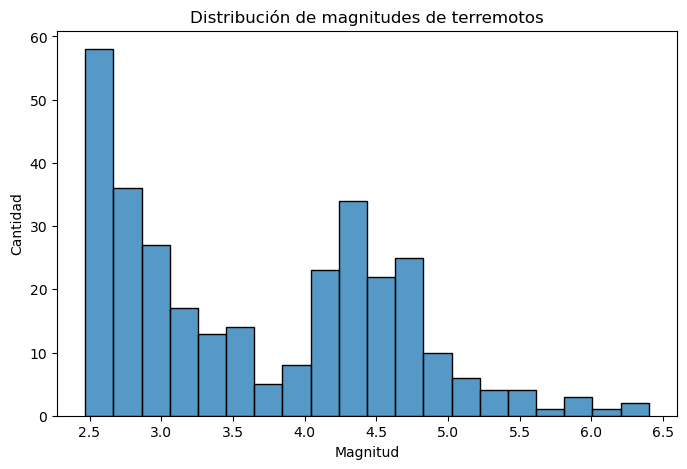

In [16]:


plt.figure(figsize=(8, 5))
sns.histplot(df["mag"], bins=20) # Cuando las variables son continuas puedes agruparlos en bins para mostrarlas
plt.title("Distribución de magnitudes de terremotos")
plt.xlabel("Magnitud")
plt.ylabel("Cantidad")
plt.show()


Algunas preguntas que nos ayuda a responder:

- ¿Hay más terremotos pequeños o grandes?
- ¿Qué tan común es un terremoto de magnitud > 5?

### Diagrama de cajas y bigotes

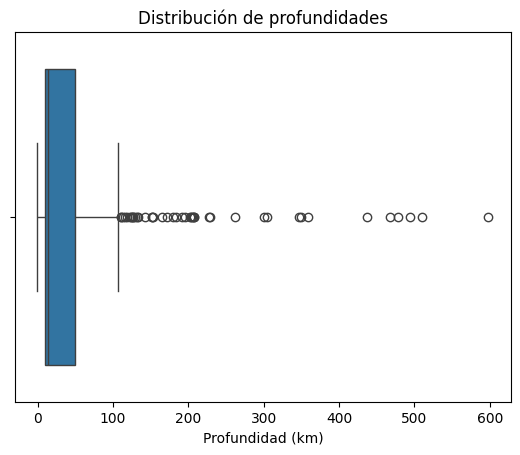

In [9]:
sns.boxplot(x=df["depth"])
plt.title("Distribución de profundidades")
plt.xlabel("Profundidad (km)")
plt.show()


Extremos de la caja:

- El borde izquierdo representa el primer cuartil (Q1): el 25% de los datos están por debajo de este valor.

- El borde derecho representa el tercer cuartil (Q3): el 75% de los datos están por debajo de este valor.

- Ancho de la caja (IQR): Indica el rango intercuartílico, es decir, el rango donde se concentra el 50% central de los datos.

- Línea dentro de la caja: Representa la mediana (Q2), o valor central.

- ¿Hay outliers en profundidad?

- ¿Qué rango es más frecuente?

### Gráfico de línea con las cantidaes por día

| Símbolo | Descripción        |
|---------|--------------------|
| "o"     | Círculo            |
| "s"     | Cuadrado           |
| "^"     | Triángulo arriba   |
| "v"     | Triángulo abajo    |
| "*"     | Estrella           |
| "x"     | Cruz               |
| "."     | Punto muy pequeño  |


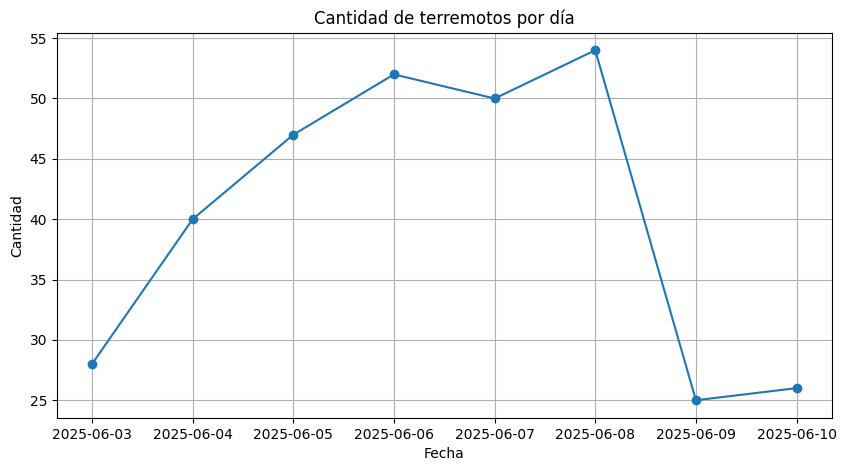

In [10]:
df["time"] = pd.to_datetime(df["time"])

# Contamos terremotos por día
df["date"] = df["time"].dt.date
events_per_day = df.groupby("date").size()

plt.figure(figsize=(10, 5))
events_per_day.plot(marker="o")
plt.title("Cantidad de terremotos por día")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()


- ¿Qué día fue el más sísmico?


## Violinplot

- Muestra la distribución de datos por categoría.

- Usa una estimación de densidad (KDE) reflejada verticalmente (como un violín).

- También muestra los valores extremos, mediana y rango intercuartílico (como el boxplot).

C:\Users\Jorge\AppData\Local\Temp\ipykernel_12944\1862066761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='type', y='depth', palette='husl')


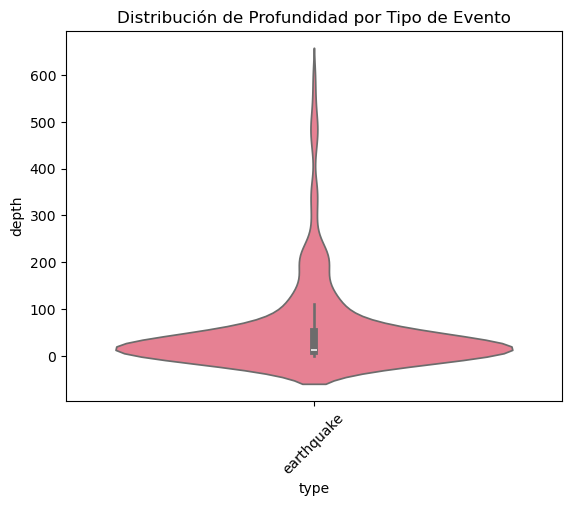

In [8]:
plt.figure()
sns.violinplot(data=df, x='type', y='depth', palette='husl')
plt.title("Distribución de Profundidad por Tipo de Evento")
plt.xticks(rotation=45)
plt.show()

## Kernel Density Estimate Plot

Estima la función de densidad de probabilidad de una variable (continua).

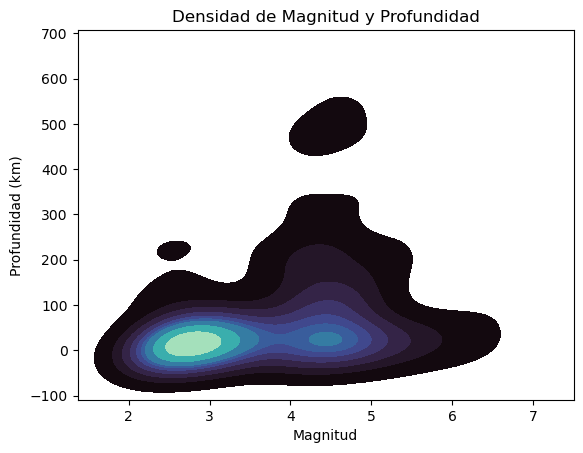

In [9]:
plt.figure()
sns.kdeplot(data=df, x='mag', y='depth', fill=True, cmap='mako', thresh=0.05)
plt.title("Densidad de Magnitud y Profundidad")
plt.xlabel("Magnitud")
plt.ylabel("Profundidad (km)")
plt.show()

C:\Users\Jorge\AppData\Local\Temp\ipykernel_12944\1852194250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='depth', x='mag_range',  palette='Set2')


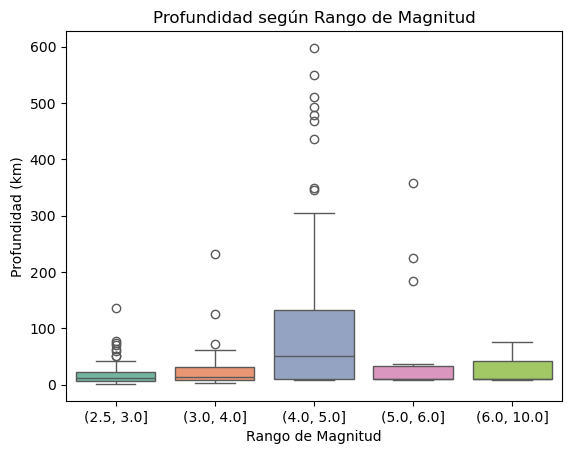

In [13]:
df['mag_range'] = pd.cut(df['mag'], bins=[2.5, 3, 4, 5, 6, 10])
plt.figure()
sns.boxplot(data=df, x='mag_range', y='depth', palette='Set2')
plt.title("Profundidad según Rango de Magnitud")
plt.xlabel("Rango de Magnitud")
plt.ylabel("Profundidad (km)")
plt.show()

In [20]:
df["locationSource"]

0      nn
1      us
2      us
3      tx
4      nc
       ..
308    uu
309    us
310    ak
311    us
312    us
Name: locationSource, Length: 313, dtype: object

In [19]:
df[]

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'mag_range'],
      dtype='object')

### Diagrama de dispersión

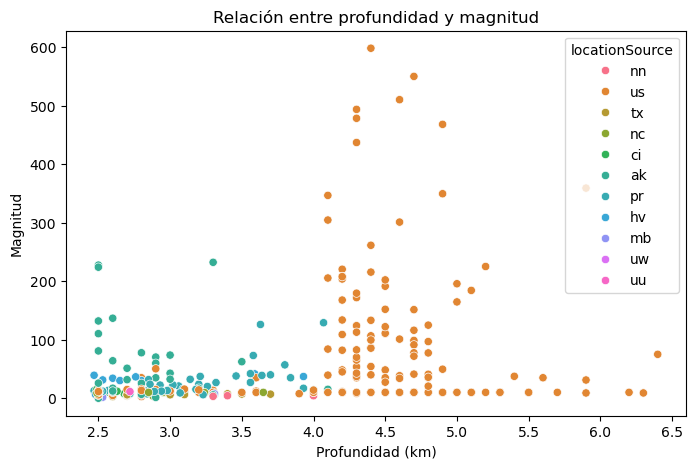

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='mag', y='depth', hue='locationSource')
plt.title("Relación entre profundidad y magnitud")
plt.xlabel("Profundidad (km)")
plt.ylabel("Magnitud")
plt.show()


- ¿Los terremotos más profundos son más intensos?

- ¿Hay una nube de puntos en zonas específicas?

También podemos aplicar scatter con longitud y latitud para representar la magnitud.

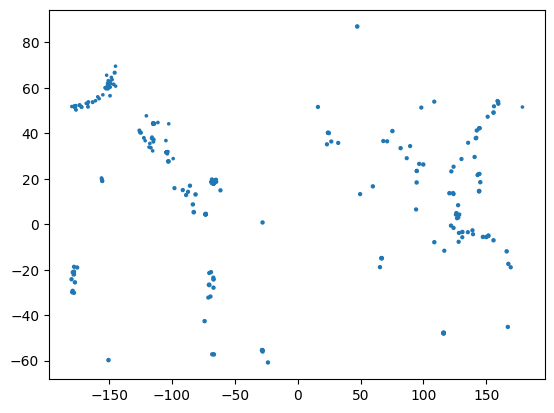

In [12]:
plt.scatter(df["longitude"], df["latitude"], s=df["mag"])

- ¿Hay regiones de mayor concentración de terremotos?

C:\Users\Jorge\AppData\Local\Temp\ipykernel_12944\3297733033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y='place', x='mag', palette='flare')


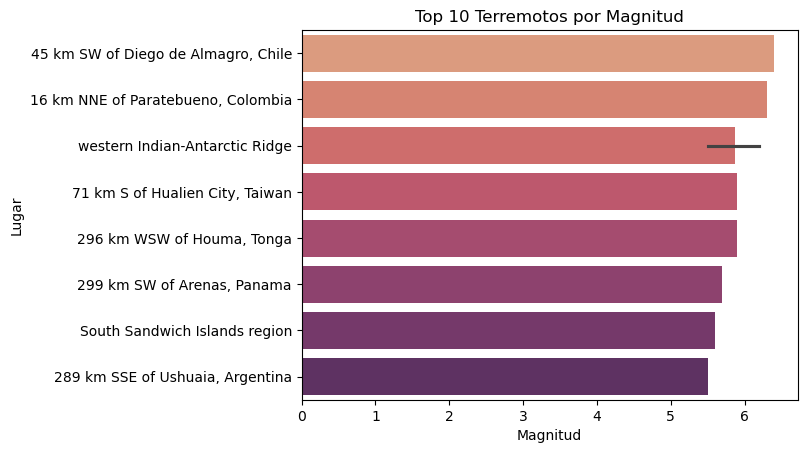

In [12]:
top10 = df.nlargest(10, 'mag')[['place', 'mag']]
plt.figure()
sns.barplot(data=top10, y='place', x='mag', palette='flare')
plt.title("Top 10 Terremotos por Magnitud")
plt.xlabel("Magnitud")
plt.ylabel("Lugar")
plt.show()

## Ejercicios 3 (20 min)
1. Realiza un Boxplot de la Elevación por tipo de aeropuerto.

    a) ¿Qué tipo de aeropuerto suele estar más alto?

    b) ¿Hay outliers o valores extremos notables?

2. Barplot – Aeropuertos por continente.

    ¿Dónde hay mayor densidad de aeropuertos?

    ¿Algún continente está sorprendentemente bajo?

3. Histograma – Elevación.

    ¿Cuál es el rango típico de elevación?

    ¿Qué proporción está por debajo de 500 ft?

4. Scatterplot geográfico (lat/lon) Ubicación de aeropuertos por tipo.

5. Barplot – Aeropuertos por país (top 10).

6. Visualizar la distribución de la elevación (elevation_ft) por continente con forma, densidad y dispersión.

7. Strip Plot + Jitter (ruido visual para ver densidad) para x= type e y = "elevation_ft" (https://www.geeksforgeeks.org/python/stripplot-using-seaborn-in-python/)

## Recursos adicionales:

- Documentación de seaborn oficial: https://seaborn.pydata.org/
- Tutorial de seaborn paso a paso: https://www.datasource.ai/es/data-science-articles/una-guia-paso-a-paso-para-crear-visualizaciones-avanzadas-de-datos-de-python-con-seaborn-matplotlib
- Documentación del conjunto de datos: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
- Paletas de colores: https://seaborn.pydata.org/tutorial/color_palettes.html